In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Processing

The padova dataset is used. 
Precipitation: 1725-2022
T: 1774-1997

(Marani, M. and Zanetti, S., 2015. Long‐term oscillations in rainfall extremes in a 268 year daily time series. Water Resources Research, 51(1), pp.639-647.)


In [3]:
prcp = pd.read_csv('dataset/padova/PADOVA_1725_2022_PRCPdaily_reorganize.csv')
prcp['Date'] = pd.to_datetime((prcp.YY*10000+prcp.MM*100+prcp.DD).apply(str),format='%Y%m%d')
prcp = prcp.drop(['DD', 'MM', 'YY'], axis=1)[['Date', 'PRCP']]
prcp.head()

,Date,PRCP
0,1725-01-01,0.0
1,1725-01-02,0.0
2,1725-01-03,0.0
3,1725-01-04,0.0
4,1725-01-05,0.0


In [16]:
temp = pd.read_csv('dataset/padova/PADOVA_1774_1997_Tdaily_maxmin.csv')
temp['Date'] = pd.to_datetime(temp['TIME'], dayfirst=True)
temp = temp.drop(['TIME'], axis=1)
temp.head()

,Tmin,Tmax,Tmean,Date
0,3.2,6.4,4.8,1774-01-01
1,-1.2,0.0,-0.6,1774-01-02
2,-2.9,-1.6,-2.3,1774-01-03
3,-3.8,-2.1,-2.9,1774-01-04
4,-6.3,-1.9,-4.1,1774-01-05


In [18]:
# Use how='outer' for an union of the two dataframes
df = pd.merge(prcp, temp, on='Date', how='inner')
df.head()

,Date,PRCP,Tmin,Tmax,Tmean
0,1774-01-01,11.108,3.2,6.4,4.8
1,1774-01-02,5.084,-1.2,0.0,-0.6
2,1774-01-03,0.000,-2.9,-1.6,-2.3
3,1774-01-04,0.000,-3.8,-2.1,-2.9
4,1774-01-05,0.000,-6.3,-1.9,-4.1


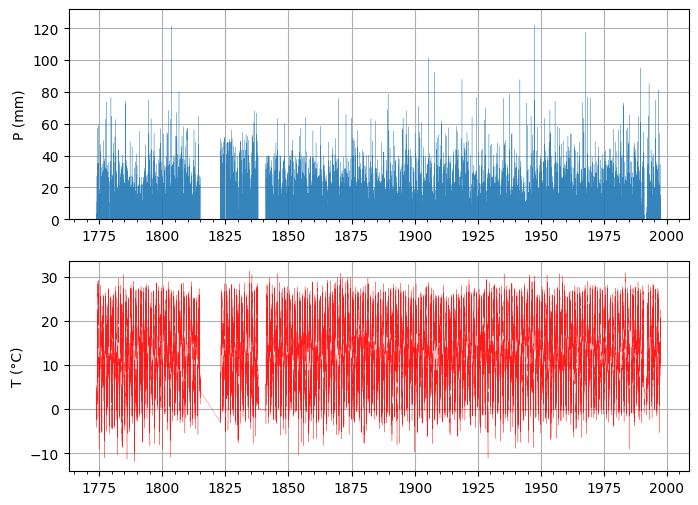

In [28]:
fig, axs = plt.subplots(2, figsize=(8, 6))

# Plotting precipitation
axs[0].plot(df['Date'], df['PRCP'], label='P (mm)', alpha=0.9, linewidth=0.2)

# Styling the axis
axs[0].set_ylim([df['PRCP'].min(), df['PRCP'].max()+10])
axs[0].set_ylabel('P (mm)')

# Plotting temperature
axs[1].plot(df['Date'], df['Tmean'], label='Tmean (°C)', alpha=0.9, linewidth=0.2, color='red')
axs[1].set_ylabel('T (°C)')

for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator(25))
    ax.xaxis.set_minor_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')

    ax.grid(True)

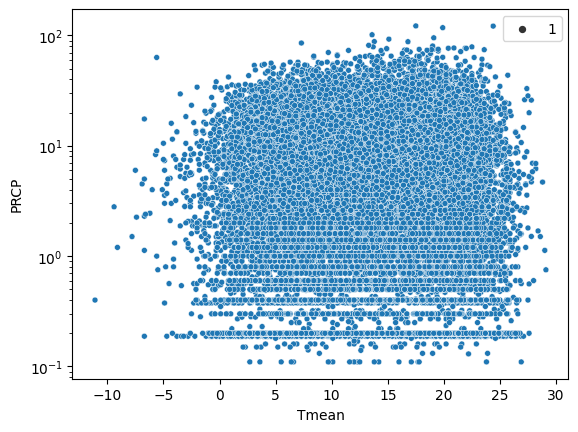

In [37]:
sns.scatterplot(data=df[df['PRCP'] > 0.1], x='Tmean', y="PRCP", size=1)
plt.yscale('log')

In [32]:
df[df['PRCP'] > 0.1]

,Date,PRCP,Tmin,Tmax,Tmean
0,1774-01-01,11.108,3.2,6.4,4.8
1,1774-01-02,5.084,-1.2,0.0,-0.6
6,1774-01-07,0.752,-3.1,2.9,-0.1
11,1774-01-12,0.752,1.5,2.4,1.9
17,1774-01-18,1.504,3.7,7.0,5.4
...,...,...,...,...,...
76918,1997-05-06,1.200,13.2,18.1,15.6
76920,1997-05-08,15.200,8.9,11.9,10.4
76921,1997-05-09,2.400,7.3,17.5,12.4
76922,1997-05-10,1.200,11.9,19.2,15.5
